<a href="https://colab.research.google.com/github/D-Anitha96038545/Blog_website/blob/main/task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

----- Dataset -----
  Order ID Product Category Product Name  Order Date  Sales  Quantity  \
0  CA-1001        Furniture        Chair  2023-01-10    250         2   
1  CA-1002  Office Supplies        Paper  2023-02-12     30         5   
2  CA-1003       Technology       Laptop  2023-02-25   1200         1   
3  TX-1004       Technology   Headphones  2023-03-01    150         3   
4  NY-1005        Furniture        Table  2023-03-15    400         1   

   Discount  Profit   Region  
0      0.10      50     West  
1      0.00      10     East  
2      0.20     200    South  
3      0.15      20  Central  
4      0.05      80     West  

----- Profit and Low Profit Flag -----
  Product Name  Profit Low_Profit
0        Chair    50.0         No
1        Paper    10.0        Yes
2       Laptop    40.0         No
3   Headphones    20.0        Yes
4        Table    80.0         No

Missing Values in each column:
Order ID            0
Product Category    0
Product Name        0
Order Date   

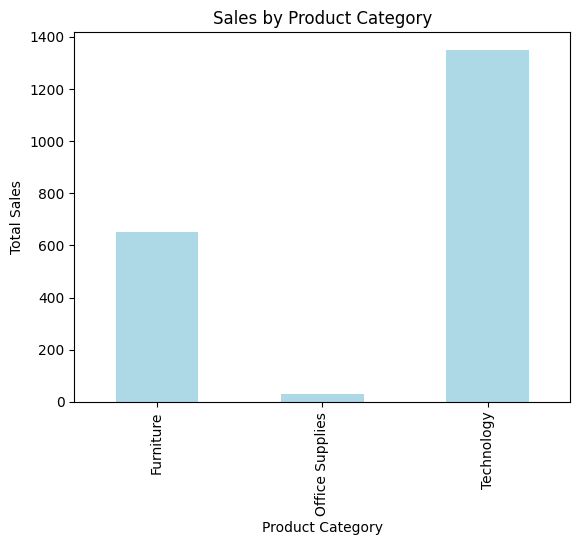

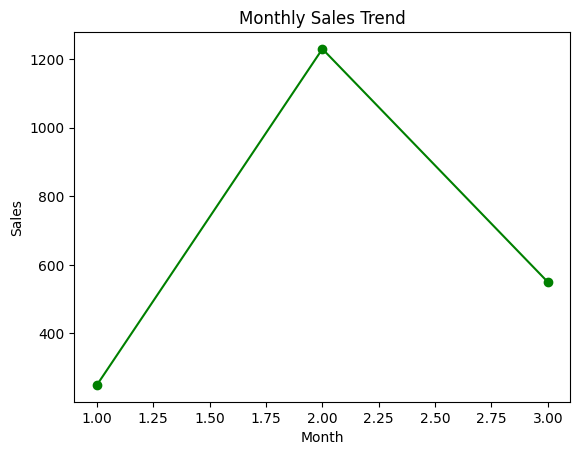

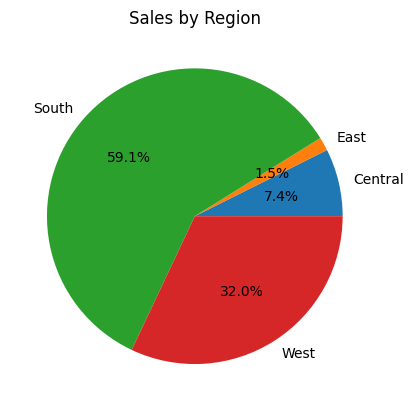

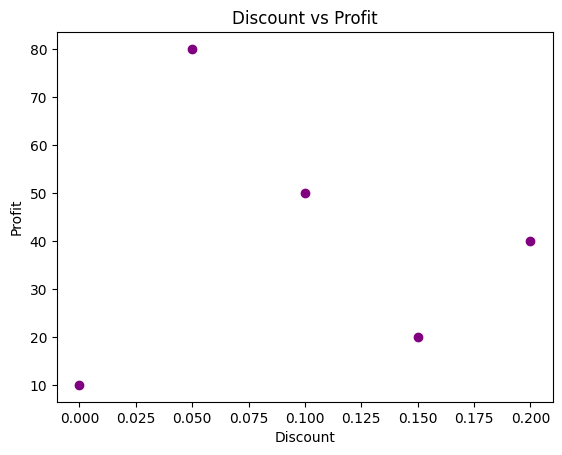

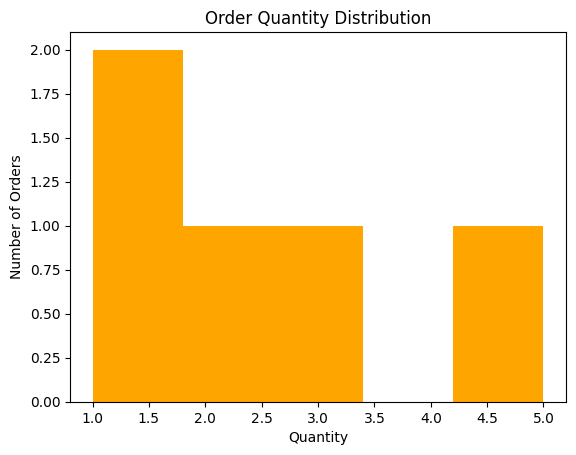

In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Create a small sample sales dataset
data = {
    'Order ID': ['CA-1001', 'CA-1002', 'CA-1003', 'TX-1004', 'NY-1005'],
    'Product Category': ['Furniture', 'Office Supplies', 'Technology', 'Technology', 'Furniture'],
    'Product Name': ['Chair', 'Paper', 'Laptop', 'Headphones', 'Table'],
    'Order Date': ['2023-01-10', '2023-02-12', '2023-02-25', '2023-03-01', '2023-03-15'],
    'Sales': [250, 30, 1200, 150, 400],
    'Quantity': [2, 5, 1, 3, 1],
    'Discount': [0.1, 0.0, 0.2, 0.15, 0.05],
    'Profit': [50, 10, 200, 20, 80],
    'Region': ['West', 'East', 'South', 'Central', 'West']
}

# Step 3: Convert data into DataFrame
df = pd.DataFrame(data)
print("----- Dataset -----")
print(df)

# Step 4: Using NumPy to calculate Sales per Unit
df['Sales_per_Unit'] = np.divide(df['Sales'], df['Quantity'])

# Step 5: Make one Profit value empty
df.loc[2, 'Profit'] = np.nan

# Step 6: Fill missing Profit with average (using NumPy)
avg_profit = np.nanmean(df['Profit'].values)
df['Profit'] = np.where(np.isnan(df['Profit']), avg_profit, df['Profit'])

# Step 7: Flag low profit using NumPy
df['Low_Profit'] = np.where(df['Profit'] < 30, 'Yes', 'No')

# Step 8: Show Product Name, Profit, Low Profit
print("\n----- Profit and Low Profit Flag -----")
print(df[['Product Name', 'Profit', 'Low_Profit']])

# Step 9: Check missing and duplicate values
print("\nMissing Values in each column:")
print(df.isnull().sum())
print("Total Duplicate Rows:", df.duplicated().sum())

# Step 10: Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Step 11: Extract Month and Weekday
df['Month'] = df['Order Date'].dt.month
df['Weekday'] = df['Order Date'].dt.day_name()

# Step 12: Basic insights
print("\nTotal Sales Amount:", np.sum(df['Sales']))
print("Average Profit:", np.mean(df['Profit']))
print("Standard Deviation of Discount:", np.std(df['Discount'], ddof=1))  # ddof=1 for sample std

# Step 13: Top records with highest Sales
print("\nTop Sales Records:")
print(df.sort_values(by='Sales', ascending=False))

# Step 14: Total Profit by Region
profit_by_region = df.groupby('Region')['Profit'].sum()
print("\nTotal Profit by Region:")
print(profit_by_region)

# Visualization Section

# Chart 1: Sales by Product Category
df.groupby('Product Category')['Sales'].sum().plot(kind='bar', color='lightblue')
plt.title('Sales by Product Category')
plt.ylabel('Total Sales')
plt.show()

# Chart 2: Monthly Sales Trend
df.groupby('Month')['Sales'].sum().plot(kind='line', marker='o', color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

# Chart 3: Sales by Region
df.groupby('Region')['Sales'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales by Region')
plt.ylabel('')
plt.show()

# Chart 4: Discount vs Profit
plt.scatter(df['Discount'], df['Profit'], color='purple')
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

# Chart 5: Quantity Distribution
plt.hist(df['Quantity'], bins=5, color='orange')
plt.title('Order Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Number of Orders')
plt.show()
